Q1  

Number of Multiplications: $nmk$
    
Number of Addiditions: $nm(k-1)$

Since multiplying a (n,k) matrix and a (k,m) matrix will result in a (n,m) which will have $nm$ elements. 

Each element will be calculated by multiplying individually k elements in a row from First matrix and k elements in a column from the second matrix. Afterward the k numbers that we got after multiplication will be added this will involve (k-1) additions. Therefore total number of multiplications for calculating an individual element would be k and total number of additions will be k-1

In [1]:
#Q2
import time 
import numpy as np
n = int(input("n"))
k = int(input("k"))
m = int(input("m"))

A = np.random.randint(-100,100,size=(n,k))
B = np.random.randint(-100,100,size=(k,m))
print("A:\n",A,"\n")
print("B:\n",B)
M = np.zeros((n,m))
for i in range(n):
    list = []
    for j in range(m):
        sum = 0
        for l in range(k):
            sum += A[i][l]*B[l][j]
        M[i][j]=int(sum)

print("\nOur Algorithm: ",M,"\n")

M_numpy = np.matmul(A,B)
print("\nMatmul: ",M_numpy,"\n")

print("\n Finding time for the algorithm:")
time1_total = 0
time2_total = 0
no = np.random.randint(0,100)
for i in range(no):
    val = np.random.randint(0,100,size=(3,1))
    n = int(val[0])
    k = int(val[1])
    m = int(val[2])
    A = np.random.randint(-100,100,size=(n,k))
    B = np.random.randint(-100,100,size=(k,m))
    M = np.zeros((n,m))
    start1 = time.time()
    for i in range(n):
        for j in range(m):
            sum = 0
            for l in range(k):
                sum += A[i][l]*B[l][j]
            M[i][j]=int(sum)
    end1 = time.time()
    time1_total += (end1-start1)
    start2 = time.time() 
    M_numpy = np.matmul(A,B)
    end2 = time.time()
    time2_total += (end2-start2)
print("\nOur Algo: ",time1_total/no)
print("\n Matmul:", time2_total/no)

n2
k5
m6
A:
 [[ 86 -15 -69  81  33]
 [ -8 -64 -27  93   8]] 

B:
 [[ 67 -22   7   6 -29 -66]
 [-19 -55  25  58 -61 -71]
 [-19 -61  57 -24 -64 -69]
 [ 45  23 -57 -24  71 -96]
 [ 71  36  10  60 -46   5]]

Our Algorithm:  [[13346.  6193. -7993.  1338.  7070. -7461.]
 [ 5946.  7770. -8416. -4864. 12099. -1953.]] 


Matmul:  [[13346  6193 -7993  1338  7070 -7461]
 [ 5946  7770 -8416 -4864 12099 -1953]] 


 Finding time for the algorithm:

Our Algo:  0.09048752031828228

 Matmul: 0.0004650141063489412


As we can see the numpy function Matmul multiplies much faster than our algorithm. This is obvious since our algorithm as proved above has a time complexity of $O(n^3)$ while their algorithm as stated in an article is of $O(n^{2.37188})$ which is much better than our algorithm.

Q3.
According to the algorithm stated  in the question in order to find the median in the worst case scenario it will make $n + (n-1) + (n-2) +.... n/2$ searches which is equal to $s = n/2(n/2 + n)$. This gives us the time complexity of $O(n^2)$. If we are able to sort the array using an algorith of a lower time complexity  it will improve the running time. We can use merge sort, for sorting the array which has a time complexity of $O(nlog(n))$.

In [21]:
#Q3

import numpy as np

#Algorithm 1: Algorithm suggested by the question
def func(arr):
    l = len(arr)
    temp = arr
    if(l%2==0):
        n1 = temp[0]
        n2 = temp[1]
        for i in range(n//2+1):
            max = int(temp[0])
            for j in temp:
                if (max<=j):
                    max = j
            if(i == n//2-1):
                n2 = max
            print(max)
            temp.remove(max)
           
        n1 = max
        print(n1,n2)
        return (n1+n2)/2
    else:
        for i in range(n+1//2):
            max = int(temp[0])
            for j in temp:
                if (max<=j):
                    max = j
            temp.remove(max)
        return max
#Algorithm 2: Using .sort() which has a time complexity of nlog(n) which is better when compared to n^2 of the 
#previous algorithm

def func2(arr,n):
    arr.sort()
    if(n%2==0):
        n1 = arr[n//2]
        n2 = arr[n//2-1]
        return (n1+n2)/2
    else:
        return arr[(n-1)//2]
    
n = int(input())
arr1 = []
for i in range(n):
    arr1.append(np.random.randint(-100,100))

print("\nArray: ",arr1)

median1 = func(arr1.copy())
print("\nMedian by algorithm1: ",median1)

median2 = func2(arr1.copy(),n)
print("\nMedian by Algorithm2: ",median2)

median3 = np.median(arr1.copy())
print("\nMedian by numpy.median: ",median2)



10

Array:  [-75, 36, 9, -88, 49, -48, -23, -79, 50, -74]
50
49
36
9
-23
-48
-48 -23

Median by algorithm1:  -35.5

Median by Algorithm2:  -35.5

Median by numpy.median:  -35.5


Q4

Function: $f(x,y) = x^2y + y^3sin(x)$

Gradient of the function with respect to x is: $2xy + ycos(x)$

Gradient of the function with respect to y is: $x^2 + 3y^2sin(x)$

In [8]:
#Q5 (Working on Google colab)
import numpy as np
import jax.numpy as jnp
from jax import grad

def func(x):
  return x[0]**2*x[1] + x[1]**3*jnp.sin(x[0])
def deri(x):
  return (float(2*x[0]*x[1]+x[1]**3*jnp.cos(x[0])),float(x[0]**2+3*x[1]**2*jnp.sin(x[0])))
no = int(input())

val = np.random.uniform(-100, 100, (no, 2))
jaxgrad = []
mygrad = []

gx = grad(func)
for i in val:
  jaxgrad.append(gx(i))
  mygrad.append(deri(i))


ModuleNotFoundError: No module named 'jaxlib'

In [7]:
#Q6
import sympy as smp
import numpy as np
from sympy.vector import CoordSys3D, gradient

R = CoordSys3D('R')
func = R.x**2*R.y+R.y*smp.sin(R.x)
gradient(func)

#As we can see in the output that it matches our answer analytically

(2*R.x*R.y + R.y*cos(R.x))*R.i + (R.x**2 + sin(R.x))*R.j

In [ ]:
#Q7
database = {
    2022: {
        "Branch 1":{
            1: {
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English":70
                }
            }
        },
        "Branch 2":{}
    },
    2023:{
        "Branch 1":{},
        "Branch 2":{}
    },
     2024:{
        "Branch 1":{},
        "Branch 2":{}
    },
     2025:{
        "Branch 1":{},
        "Branch 2":{}
    }
}

print(database[2022]["Branch 1"][1]["Marks"]["Maths"])

In [21]:
#Q8
class Marks():
    def __init__(self,Maths,English):
        self.Maths = Maths
        self.English = English
class Students():
    def __init__(self,Rollnumber,Name,Marks):
        self.Rollnumber = Rollnumber
        self.Name = Name
        self.Marks = Marks
class Branch():
    def __init__(self,BranchName,Students):
        self.BranchName = BranchName
        self.Students = Students
class Year():
    def __init__(self,YearNo,Branch):
        self.YearNo = YearNo
        self.Branch = Branch

database = [Year(2022,[
                Branch("Branch 1",[Students("1","N",Marks(100,70))]),
                Branch("Branch 2",[])
                      ]),
        Year(2023,[Branch("Branch 1",[]),Branch("Branch 2",[])]),
        Year(2024,[Branch("Branch 1",[]),Branch("Branch 2",[])]),
        Year(2025,[Branch("Branch 1",[]),Branch("Branch 2",[])])]
print(database[0].YearNo,",", database[0].Branch[0].BranchName,",",database[0].Branch[0].Students[0].Name)

2022 , Branch 1 , N


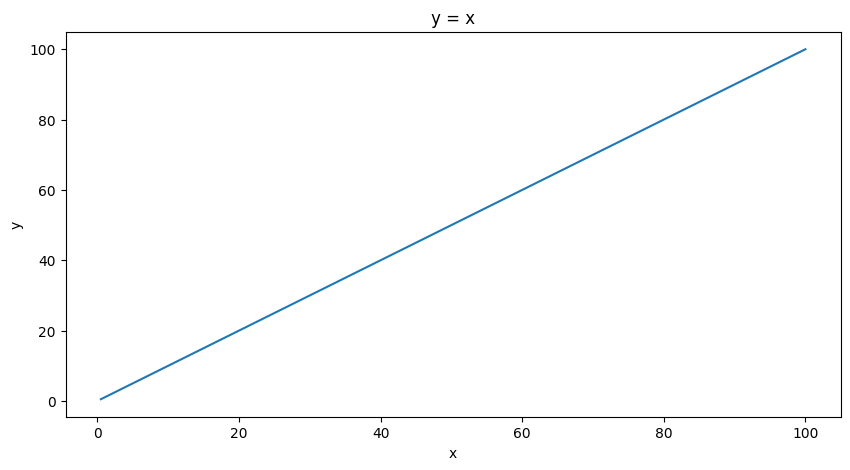

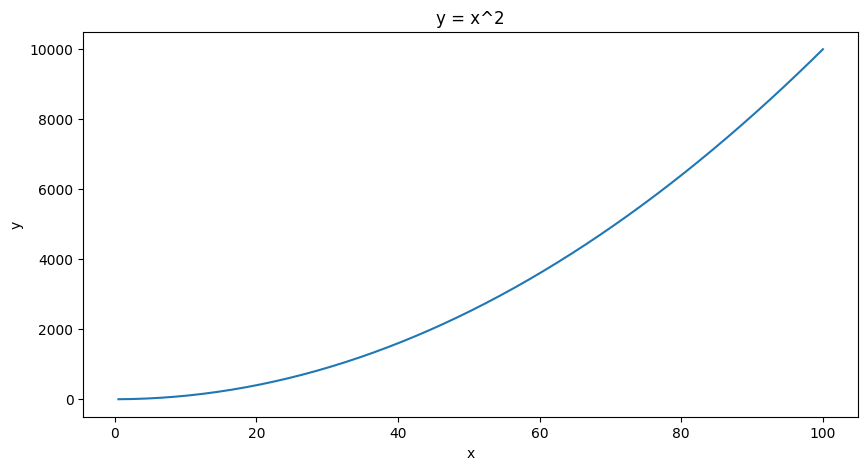

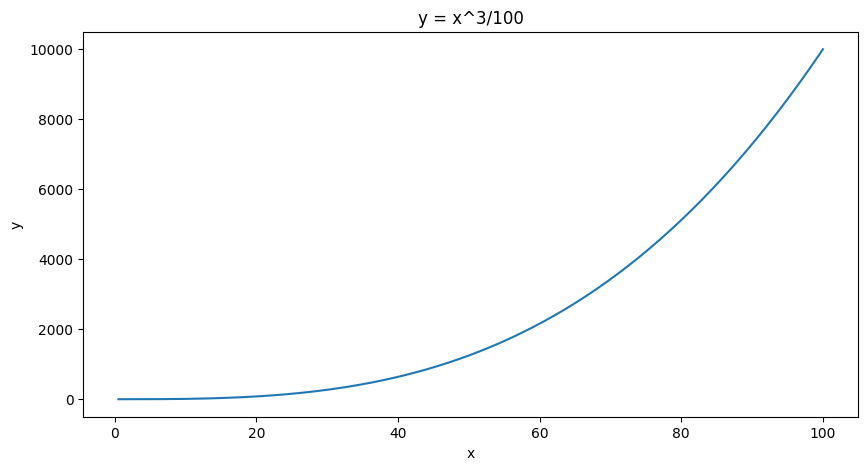

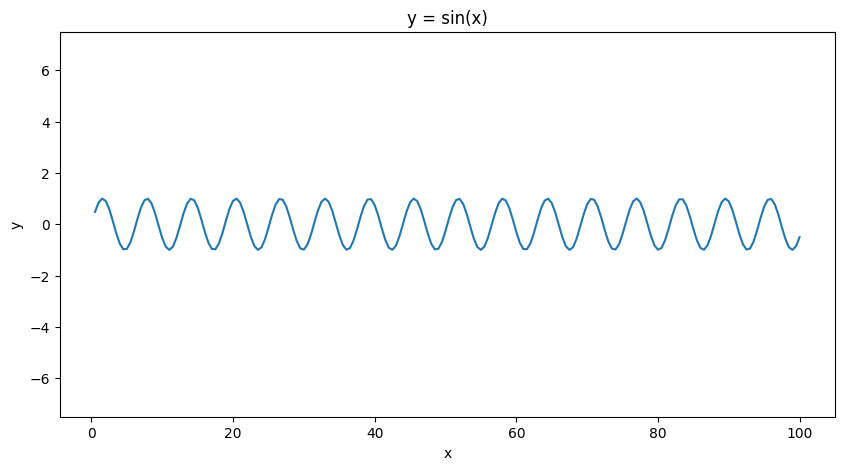

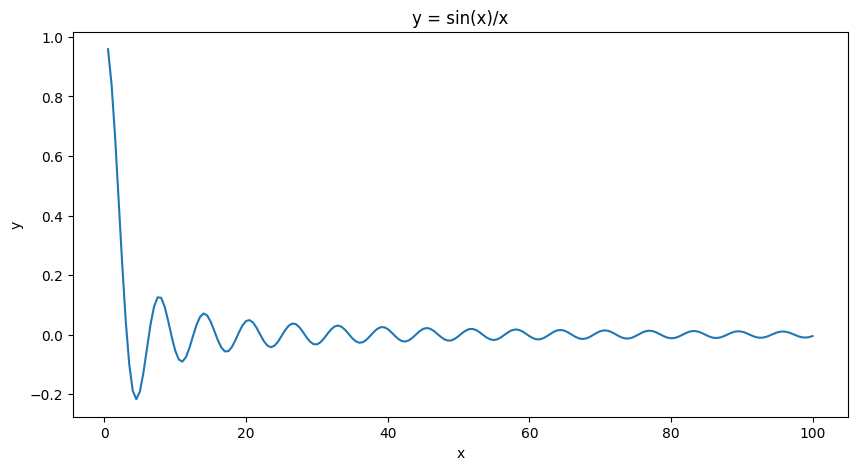

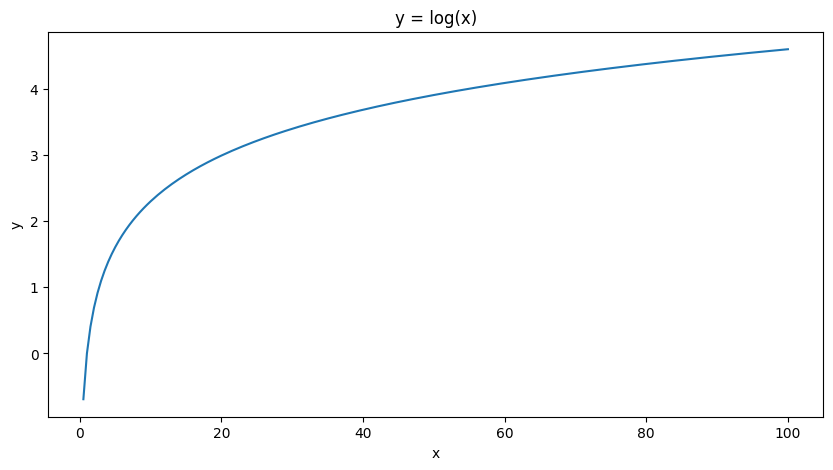

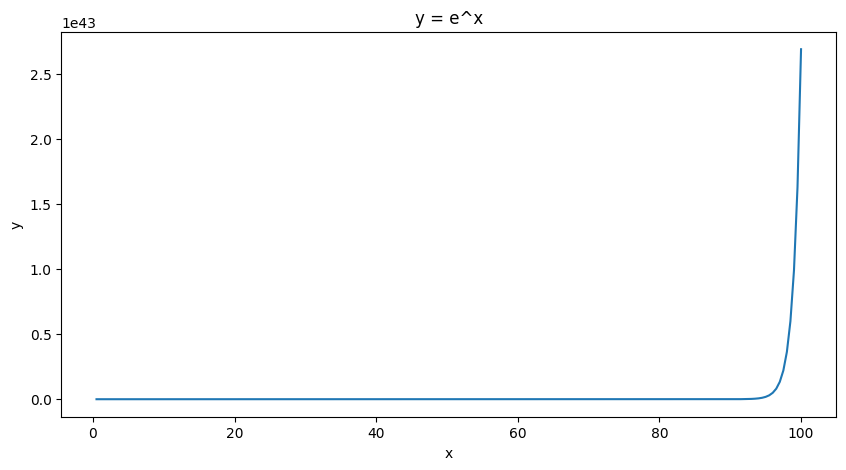

In [31]:
#Q9
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.5,100,num = 200,endpoint = True)
plt.figure(figsize=(10,5))

y1 = x
plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = x")
plt.show()

plt.figure(figsize=(10,5))
y2 = x ** 2
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = x^2")
plt.show()

plt.figure(figsize=(10,5))
y3 = x ** 3/100
plt.plot(x, y3)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = x^3/100")
plt.show()

plt.figure(figsize=(10,5))
y4 = np.sin(x)
plt.plot(x, y4)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-7.5,7.5)
plt.title("y = sin(x)")
plt.show()

plt.figure(figsize=(10,5))
y5 = np.divide(np.sin(x),x)
plt.plot(x, y5)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = sin(x)/x")
plt.show()

plt.figure(figsize=(10,5))
y6 = np.log(x)
plt.plot(x, y6)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = log(x)")
plt.show()

plt.figure(figsize=(10,5))
y7 = np.exp(x)
plt.plot(x, y7)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = e^x")
plt.show()


In [25]:
#Q10
import numpy as np
import pandas as pd
matrix = np.random.uniform(1,2, size=(20, 5))
dataframe = pd.DataFrame(matrix, columns = ['a','b','c','d','e'])

sdev = dataframe.std()
max_sdev = max(sdev)

col = 'a'

for k,v in sdev.items():
    if v == max_sdev:
        col = k

mean = dataframe.mean(axis = 1)
min_mean = min(mean)

row = 0

for k,v in mean.items():
    if v == min_mean:
        row = k
        
print("Matrix:\n",matrix,"\n")
print("Dataframe\n",dataframe,"\n")
print("Highest Standard Dev Column:",col,"\n")
print("Lowest Mean Row:",row)

dataframe['f'] = dataframe[list(dataframe)].sum(axis=1)
print("\nAdding column f to Dataframe:\n", dataframe)

g = []
for i in dataframe['f']:
    if(i<8):
        g.append("LT8")
    else:
        g.append("GT8")
dataframe['g'] = g
print("\nAdding column g to Dataframe:\n", dataframe)

lt8 =[]
gt8 =[]
for i in range(len(dataframe.index)):
    if(dataframe['g'][i]=="LT8"):
        lt8.append(dataframe['f'][i])
    else:
        gt8.append(dataframe['f'][i])
        
sdev_lt8 = np.std(lt8)
sdev_gt8 = np.std(gt8)
print("\nStandard Deviation for LT8 rows is: ",sdev_lt8)
print("\nStandard Deviation for GT8 rows is: ",sdev_gt8)

Matrix:
 [[1.80642514 1.38331482 1.21496252 1.20343158 1.22434205]
 [1.21950117 1.23665417 1.53354437 1.50939508 1.91137292]
 [1.96431842 1.58224028 1.41460369 1.53613936 1.24700503]
 [1.69373828 1.27101176 1.93644993 1.99229198 1.36253609]
 [1.62677507 1.46522726 1.75305177 1.4943849  1.51578948]
 [1.74303419 1.24339427 1.93754285 1.13468359 1.50151223]
 [1.08521039 1.55975474 1.3277673  1.22163365 1.62349668]
 [1.69240678 1.38728781 1.83234887 1.89005754 1.87532387]
 [1.87974447 1.69890411 1.28388348 1.84865745 1.68267789]
 [1.66746927 1.25378356 1.07123181 1.91878815 1.58767682]
 [1.01521645 1.34128702 1.97135166 1.74495424 1.3540291 ]
 [1.76778992 1.74158233 1.28664382 1.45171749 1.61803303]
 [1.30546987 1.26076648 1.94152629 1.69558795 1.38253792]
 [1.89434337 1.46311843 1.22066888 1.51033179 1.59936399]
 [1.5990083  1.71756857 1.35638215 1.73611493 1.11235356]
 [1.86227819 1.08587075 1.92373422 1.92713841 1.13445145]
 [1.41742802 1.3871154  1.9773201  1.49188654 1.16769861]
 [1.4

In [26]:
#Q12
import numpy as np

a = np.arange(4).reshape((4,1))
b = np.arange(4)

print(a+b)

#The above peice of code shows broadcasting. 
#Bot the arrays are of differend shape so the library expands and pads the the shape in order to make the of same shape.
#In our case both the arrays are reshaped into a 3x3 array and then the operation of addition is performed

[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]


In [27]:
#Q13
import numpy as np

def func(arr):
    flat_arr =[]
    for i in arr:
        if len(i>1):
            for j in i:
                flat_arr.append(j)
        else:
            flat_arr.append(i)
    mini = flat_arr[0]
    min_ind = 0
    for i in range(len(flat_arr)):
        if(flat_arr[i]<mini):
            mini = flat_arr[i]
            min_ind = i
    return min_ind

arr = np.random.randint(0,100,size =(5,4)) 
print("Array: \n",arr)
print("\nMy function: ",func(arr))
print("\nNumpy.argmin(): ",np.argmin(arr))

    


Array: 
 [[69 93 91 19]
 [45 53 41 59]
 [45 53 93 43]
 [52 37 79 79]
 [37 69  2 41]]

My function:  18

Numpy.argmin():  18
